# Welch's two-sample $t$-test

The goal of Welch's two-sample $t$-test to check if the means two unknown population $X \sim \mathcal{N}(\mu_X, \sigma_X)$ and $Y \sim \mathcal{N}(\mu_Y, \sigma_Y)$
are the same or different.

We previously discussed this hypothesis test in [`notebooks/35_two_sample_tests.ipynb`](../notebooks/35_two_sample_tests.ipynb).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

## Data
Two samples of numerical observations $\mathbf{x}=[x_1, x_2, \ldots, x_n]$
and $\mathbf{y}=[y_1, y_2,\ldots, y_m]$ from independent populations.

## Modeling assumptions

We assume the unknown populations are normally distributed $\textbf{(NORM)}$,
or the sample is large enough $\textbf{(LARGEn)}$.

## Hypotheses

$H_0: \mu_X = \mu_Y$ and $H_A: \mu_X \neq \mu_Y$.

## Statistical design

for $n=5$ ...


for $n=20$ ...


## Estimates

Compute the sample means
$\overline{\mathbf{x}} = \Mean(\mathbf{x})$,
$\overline{\mathbf{y}} = \Mean(\mathbf{y})$,
and the difference between means
$\hat{d} = \DMeans(\mathbf{x}, \mathbf{y}) = \overline{\mathbf{x}} - \overline{\mathbf{y}}$.

## Formulas
The estimated standard error of the difference between means estimator is

$$
  \stderrhat{\hat{d}}
        \; = \; \sqrt{  \stderrhat{\overline{\mathbf{x}}}^2 + \stderrhat{\overline{\mathbf{y}}}^2 }
        = \sqrt{ \tfrac{s_{\mathbf{x}}^2}{n} + \tfrac{s_{\mathbf{y}}^2}{m} },
$$

where $s_{\mathbf{x}}$ and $s_{\mathbf{y}}$ are the sample standard deviations.

## Test statistic

Compute the $t$-statistic $t = \frac{\hat{d} - 0}{ \stderrhat{\hat{d}} }$.

## Sampling distribution

Student's $t$-distribution with $\nu_d$ degrees of freedom,
where the degrees of freedom parameter is computed using
the helper function `calcdf`:
$\nu_d = \tt{calcdf}(s_{\mathbf{x}}, n, s_{\mathbf{y}}, m)$,
which implements the Welch--Satterthwaite formula.

## P-value calculation

In [3]:
from stats_helpers import ttest_dmeans

%psource ttest_dmeans

def ttest_dmeans(xsample, ysample, equal_var=False, alt="two-sided"):
    """
    T-test to detect difference between two populations means
    based on the difference between sample means.
    """
    # Calculate the observed difference between means
    obsdhat = mean(xsample) - mean(ysample)

    # Calculate the sample sizes and the stds
    n, m = len(xsample), len(ysample)
    sx, sy = std(xsample), std(ysample)

    # Calculate the standard error, the degrees of
    # freedom, the null model, and the t-statistic
    if not equal_var:  # Welch's t-test (default)
        seD = np.sqrt(sx**2/n + sy**2/m)
        obst = (obsdhat - 0) / seD
        dfD = calcdf(sx, n, sy, m)
        rvT0 = tdist(df=dfD)
    else:              # Use pooled variance
        varp = ((n-1)*sx**2 + (m-1)*sy**2) / (n+m-2)
        stdp = np.sqrt(varp)
        seDp = stdp * np.sqrt(1/n + 1/m)
        obst = (obsdhat - 0) / seDp
        dfp = n + m - 2
        rvT0 = tdist(df=dfp)

    # Calculate the p-value 

To perform the two-sample $t$-test on the samples `xs` and `ys`,
we call `ttest_dmeans(xs, ys)`.

## Examples

For all the examples we present below,
we assume the unknown distribution are normally distributed 

$$
    \texttt{rvX} = X \sim \mathcal{N}(\mu_X,\sigma_X)
    \qquad
    \text{and}
    \qquad
    \texttt{rvY} = Y \sim \mathcal{N}(\mu_Y,\sigma_Y).
$$


In [4]:
from scipy.stats import norm

### Example A: populations are different

Suppose the $X$-population is normally distributed 
with mean $\mu_{X}=104$
and standard deviation $\sigma_{X} = 3$,
while the $Y$-population is normally distributed 
with mean $\mu_{X}=100$
and standard deviation $\sigma_{X} = 5$

$$
    \texttt{rvX} = X \sim \mathcal{N}(104,3)
    \qquad
    \text{and}
    \qquad
    \texttt{rvY} = Y \sim \mathcal{N}(100,5).
$$

In [5]:
muXA = 104
sigmaXA = 3
rvXA = norm(muXA, sigmaXA)

muYA = 100
sigmaYA = 5
rvYA = norm(muYA, sigmaYA)

Let's generate a sample `xAs` and `yAs` of size $n=20$ from the random variables $X = \texttt{rvXA}$ and $Y = \texttt{rvYA}$.

In [6]:
np.random.seed(42)

# generate a random sample of size n=20 from rvX
n = 20
xAs = rvXA.rvs(n)

# generate a random sample of size m=20 from rvY
m = 20
yAs = rvYA.rvs(m)
xAs, yAs

(array([105.49014246, 103.5852071 , 105.94306561, 108.56908957,
        103.29753988, 103.29758913, 108.73763845, 106.30230419,
        102.59157684, 105.62768013, 102.60974692, 102.60281074,
        104.72588681,  98.26015927,  98.8252465 , 102.31313741,
        100.96150664, 104.942742  , 101.27592777,  99.7630889 ]),
 array([107.32824384,  98.8711185 , 100.33764102,  92.87625907,
         97.27808638, 100.55461295,  94.24503211, 101.87849009,
         96.99680655,  98.54153125,  96.99146694, 109.26139092,
         99.93251388,  94.71144536, 104.11272456,  93.89578175,
        101.04431798,  90.20164938,  93.35906976, 100.98430618]))

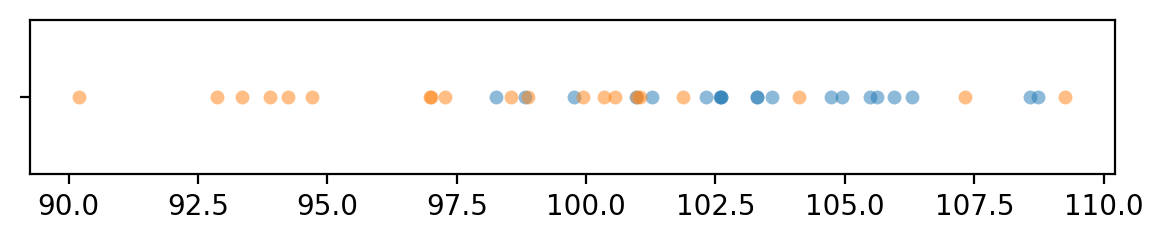

In [7]:
import seaborn as sns

with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xAs, jitter=0, alpha=0.5)
    sns.stripplot(x=yAs, jitter=0, alpha=0.5)

To obtain the $p$-value,
we first compute the observed $t$-statistic,
then calculate the tail probabilities in the two tails of the standard normal distribution $T_0 \sim \mathcal{T}(\nu_d)$.

In [8]:
from scipy.stats import t as tdist
from stats_helpers import calcdf

# Calculate the sample statistics
from stats_helpers import mean, std
obsdhat = mean(xAs) - mean(yAs)
sx, sy = std(xAs), std(yAs)

# Calculate the standard error and the t-statistic
seD = np.sqrt(sx**2/n + sy**2/m)
obst = (obsdhat - 0) / seD

# Calculate the degrees of freedom
dfD = calcdf(sx, n, sy, m)

rvT0 = tdist(df=dfD)
pvalue = rvT0.cdf(-obst) + 1-rvT0.cdf(obst)
obsdhat, pvalue

(4.815979892644748, 0.0005953205918275417)

The helper function `ttest_dmeans` in the `stats_helpers` module performs
exactly the same sequence of steps to compute the $p$-value.

In [9]:
from stats_helpers import ttest_dmeans
ttest_dmeans(xAs, yAs)

0.0005953205918276521

The $p$-value we obtain is 0.000595,
which is below the cutoff value $\alpha=0.05$,
so our conclusion is **we reject the null hypothesis**:
the difference between the means of the two unknown populations is statistically significant.

### Example B: sample from a population as expected under $H_0$

In [10]:
muXB = 100
sigmaXB = 5
rvXB = norm(muXB, sigmaXB)

muYB = muXB
sigmaYB = sigmaXB
rvYB = norm(muYB, sigmaYB)

Let's generate a sample `xs` of size $n=20$ from the random variable $X = \texttt{rvX}$,
which has the same distribution as the theoretical distribution we expect under the null hypothesis.

In [11]:
# np.random.seed(32)  produces false positie
np.random.seed(31)

# generate a random sample of size n=20 from rvX
n = 20
xBs = rvXB.rvs(n)

# generate a random sample of size m=20 from rvY
m = 20
yBs = rvYB.rvs(m)
# xBs, yBs

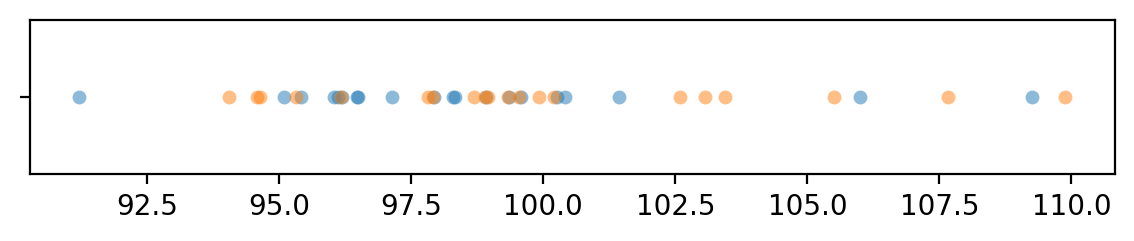

In [12]:
import seaborn as sns
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xBs, jitter=0, alpha=0.5)
    sns.stripplot(x=yBs, jitter=0, alpha=0.5)

In [13]:
from stats_helpers import ttest_dmeans
ttest_dmeans(xBs, yBs)

0.28673199738563526

The $p$-value we obtain is 0.28, which is above the cutoff value $\alpha=0.05$
so our conclusion is that we've **failed to reject the null hypothesis**:
the means of two samples are not significantly different.

## Confidence interval for the effect size

In [14]:
from stats_helpers import ci_dmeans

The confidence interval for the effect size $\Delta = \mu_X - \mu_Y$ in Example A is

In [15]:
ci_dmeans(xAs, yAs, alpha=0.1, method='a')

[2.6805293784320785, 6.951430406857417]

The confidence interval for the effect size $\Delta = \mu_X - \mu_Y$ in Example B is

In [16]:
ci_dmeans(xBs, yBs, alpha=0.1, method='a')

[-3.6180594963139185, 0.7920428862020961]

## Related



## Discussion

## Links

# Bonus examples

## Lalonde dataset

see original paper https://business.baylor.edu/scott_cunningham/teaching/lalonde-1986.pdf  
and these links for more info: https://www.one-tab.com/page/h_npVXMeTp2T7Dm5fAlDqw


In [17]:
import pandas as pd
lalonde = pd.read_csv("../datasets/lalonde.csv")
lalonde

,ID,Training,Age,Education_years,Married,No_Degree,Wage_1974,Wage_1975,Wage_1978
0,0,False,23,10,0,1,0.00,0.00,0.000
1,1,False,26,12,0,0,0.00,0.00,12383.680
2,2,False,22,9,0,1,0.00,0.00,0.000
3,3,False,18,9,0,1,0.00,0.00,10740.080
4,4,False,45,11,0,1,0.00,0.00,11796.470
...,...,...,...,...,...,...,...,...,...
440,440,True,33,12,1,0,20279.95,10941.35,15952.600
441,441,True,25,14,1,0,35040.07,11536.57,36646.950
442,442,True,35,9,1,1,13602.43,13830.64,12803.970
443,443,True,35,8,1,1,13732.07,17976.15,3786.628


In [18]:
control = lalonde[lalonde["Training"]==False]
treated = lalonde[lalonde["Training"]==True]

In [19]:
control.describe()

,ID,Age,Education_years,Married,No_Degree,Wage_1974,Wage_1975,Wage_1978
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,129.500000,25.053846,10.088462,0.153846,0.834615,2107.026658,1266.909002,4554.801126
std,75.199734,7.057745,1.614325,0.361497,0.372244,5687.905694,3102.982044,5483.835991
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,19.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,129.500000,24.000000,10.000000,0.000000,1.000000,0.000000,0.000000,3138.795500
75%,194.250000,28.000000,11.000000,0.000000,1.000000,139.424700,650.096475,7288.420000
max,259.000000,55.000000,14.000000,1.000000,1.000000,39570.680000,23031.980000,39483.530000


In [20]:
treated.describe()

,ID,Age,Education_years,Married,No_Degree,Wage_1974,Wage_1975,Wage_1978
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,352.000000,25.816216,10.345946,0.189189,0.708108,2095.573689,1532.055314,6349.143530
std,53.549043,7.155019,2.010650,0.392722,0.455867,4886.620353,3219.250870,7867.402218
min,260.000000,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,485.229800
50%,352.000000,25.000000,11.000000,0.000000,1.000000,0.000000,0.000000,4232.309000
75%,398.000000,29.000000,12.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000
max,444.000000,48.000000,16.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [21]:
from scipy.stats import ttest_ind

ttest_ind(treated["Wage_1978"], control["Wage_1978"], equal_var=False)

Ttest_indResult(statistic=2.674145513783345, pvalue=0.007892977714517335)

In [22]:
from stats_helpers import cohend2

cohend2(treated["Wage_1978"], control["Wage_1978"])

0.27271540735846456

## Example of t-test with outliers

The dataset `outliers2.csv` consists of measurements of soil score variable
using a specialized equipment for calculating soil quality.

The measurement apparatus has an upper limit beyound which it doesn't work,
so all observations that exceed this limit are coded as the value 2500.

score                                                                
      count         mean          std   min     25%    50%      75%     max
group                                                                      
A      14.0   482.857143   681.137833  26.0   82.50  153.5   715.75  2500.0
B      18.0  1213.611111  1099.014486  26.0  198.75  830.0  2500.00  2500.0

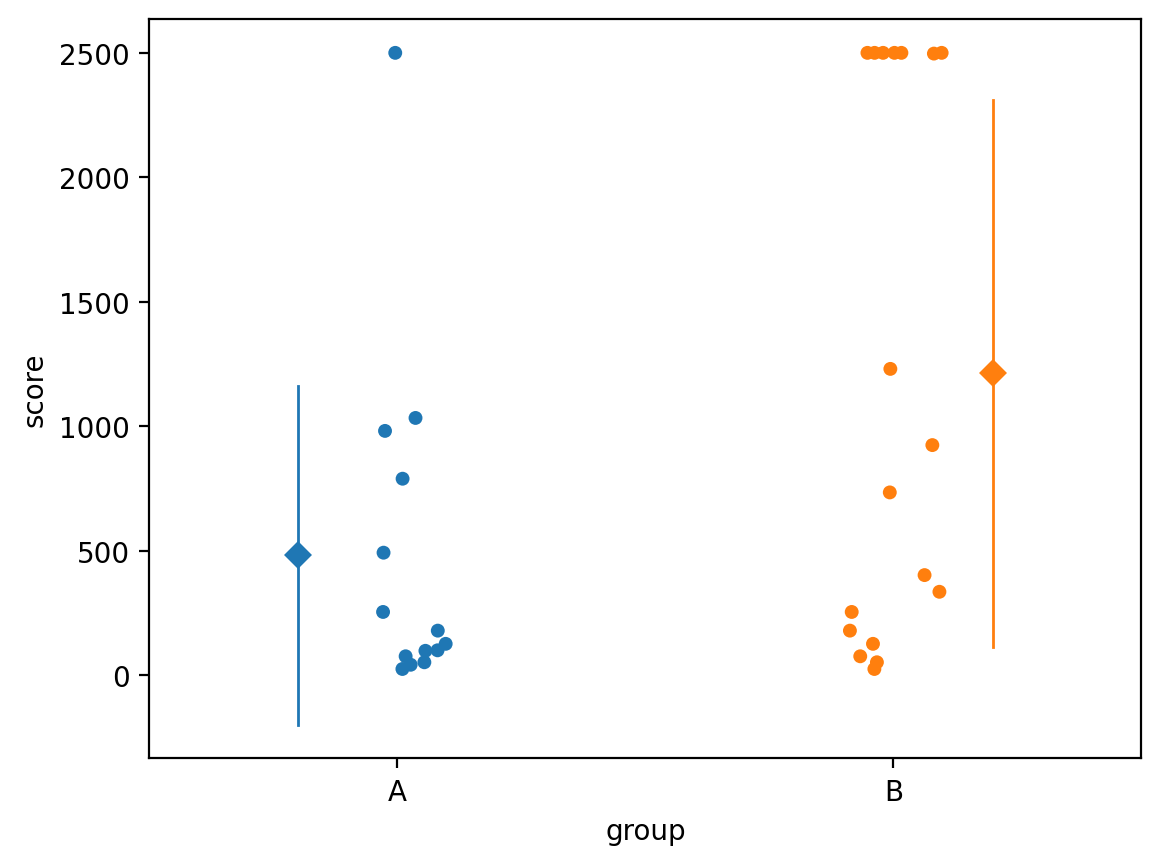

In [23]:
outliers2 = pd.read_csv("../datasets/outliers2.csv")
sns.stripplot(data=outliers2, x="group", y="score", hue="group")
sns.pointplot(data=outliers2, x="group", y="score", hue="group", dodge=0.4,
              estimator="mean", errorbar="sd", marker="D",
              markersize=5, err_kws={"linewidth":1})
outliers2.groupby("group").describe()

In [24]:
scoresA = outliers2[outliers2["group"]=="A"]["score"]
scoresB = outliers2[outliers2["group"]=="B"]["score"]

In [25]:
from scipy.stats import ttest_ind
ttest_ind(scoresA, scoresB, equal_var=False)

Ttest_indResult(statistic=-2.3080671633801986, pvalue=0.028387263383781086)

The outliers pull the mean in group B to a high value,
which leads us to conclude there is a statistically significant difference between the two groups.
This is because we're using the $t$-test when the normality assumption is not valid.

See the notebook [`Mann-Whitney_U-test.ipynb`](./Mann-Whitney_U-test.ipynb) for an analysis of this data
using the nonparametric test for comparing two groups,
which is more appropriate for data with outliers.